# Visualization and PCA of South Africa Heart Disease Dataset

## Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show

In [2]:
df = pd.read_csv(r"C:\Users\Owner\Desktop\on campis\SAheart.data.txt", index_col = 'row.names')
df = df[[c for c in df if c not in ['famhist']] 
       + ['famhist']]

In [3]:
df.head(20)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,Present
2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,Absent
3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,Present
4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,Present
5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,Present
6,132,6.20,6.47,36.21,62,30.77,14.14,45,0,Present
7,142,4.05,3.38,16.20,59,20.81,2.62,38,0,Absent
8,114,4.08,4.59,14.60,62,23.11,6.72,58,1,Present
9,114,0.00,3.83,19.40,49,24.86,2.49,29,0,Present


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   typea      462 non-null    int64  
 5   obesity    462 non-null    float64
 6   alcohol    462 non-null    float64
 7   age        462 non-null    int64  
 8   chd        462 non-null    int64  
 9   famhist    462 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 39.7+ KB


In [5]:
df.shape

(462, 10)

In [98]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [143]:
#get rid of most of the outliers
out_list = []
for c in attributeNames:
    outliers = df[df[c] > df[c].mean() + 2 * df[c].std()]
    ind_out = outliers.index.tolist()
    out_list.append(ind_out)


out_list = [item for sublist in out_list for item in sublist]

df = df.drop(out_list)


In [144]:
raw_data = df.values  
raw_data

array([[144, 0.01, 4.41, ..., 63, 1, 'Absent'],
       [118, 0.08, 3.48, ..., 46, 0, 'Present'],
       [170, 7.5, 6.41, ..., 58, 1, 'Present'],
       ...,
       [128, 2.24, 2.83, ..., 27, 1, 'Absent'],
       [108, 3.0, 1.59, ..., 55, 0, 'Absent'],
       [132, 0.0, 4.82, ..., 46, 1, 'Present']], dtype=object)

In [145]:
cols = range(0, 9) 
X = raw_data[:, cols]
X = np.asarray(X, dtype = np.intc)
X

array([[144,   0,   4, ...,   2,  63,   1],
       [118,   0,   3, ...,   3,  46,   0],
       [170,   7,   6, ...,  24,  58,   1],
       ...,
       [128,   2,   2, ...,  47,  27,   1],
       [108,   3,   1, ...,  26,  55,   0],
       [132,   0,   4, ...,   0,  46,   1]], dtype=int32)

In [146]:
attributeNames = np.asarray(df.columns[cols])
attributeNames

array(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity',
       'alcohol', 'age', 'chd'], dtype=object)

In [147]:
classLabels = raw_data[:,-1] # -1 takes the last column
classLabels

array(['Absent', 'Present', 'Present', 'Present', 'Absent', 'Present',
       'Present', 'Present', 'Absent', 'Absent', 'Present', 'Present',
       'Present', 'Present', 'Present', 'Absent', 'Absent', 'Present',
       'Absent', 'Absent', 'Absent', 'Present', 'Absent', 'Absent',
       'Absent', 'Absent', 'Absent', 'Present', 'Present', 'Absent',
       'Absent', 'Present', 'Absent', 'Present', 'Present', 'Absent',
       'Absent', 'Present', 'Absent', 'Absent', 'Absent', 'Absent',
       'Absent', 'Present', 'Absent', 'Present', 'Present', 'Absent',
       'Absent', 'Present', 'Present', 'Absent', 'Present', 'Absent',
       'Absent', 'Absent', 'Absent', 'Present', 'Absent', 'Absent',
       'Absent', 'Present', 'Absent', 'Present', 'Present', 'Absent',
       'Present', 'Absent', 'Absent', 'Present', 'Present', 'Absent',
       'Absent', 'Absent', 'Absent', 'Absent', 'Absent', 'Present',
       'Present', 'Absent', 'Present', 'Absent', 'Present', 'Absent',
       'Absent', 'Absent',

In [148]:
# Then determine which classes are in the data by finding the set of 
# unique class labels 
classNames = sorted(set(classLabels))
classNames


['Absent', 'Present']

In [149]:
# We can assign each type of Iris class with a number by making a
# Python dictionary as so:
classDict = dict(zip(classNames,range(len(classNames))))

classDict

{'Absent': 0, 'Present': 1}

In [150]:
y = np.array([classDict[cl] for cl in classLabels])
N, M = X.shape
C = len(classNames)

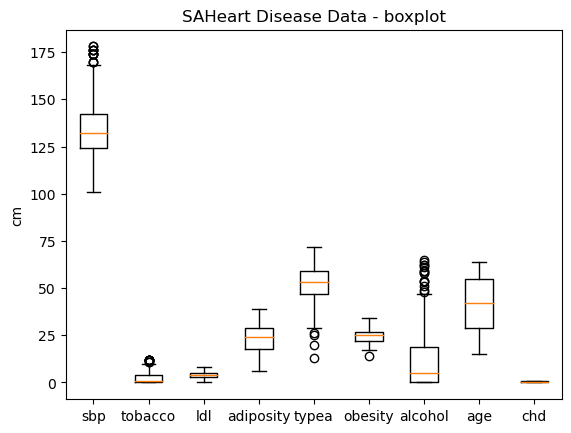

In [152]:

from matplotlib.pyplot import boxplot, xticks, ylabel, title, show

boxplot(X)
xticks(range(1,10),attributeNames)
ylabel('cm')
title('SAHeart Disease Data - boxplot')
show()

In [15]:
#week 3

In [16]:
# PCA week 2

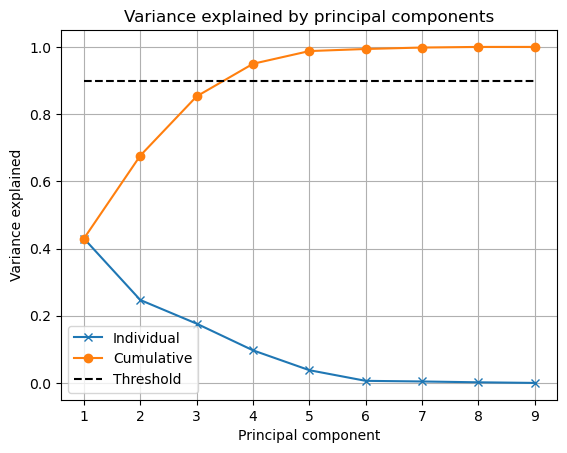

In [153]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)
Y = np.asarray(Y, dtype = np.intc)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()


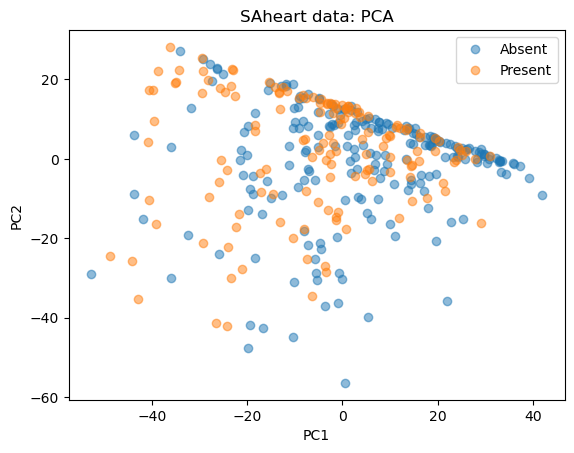

In [154]:
# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T    

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title('SAheart data: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()


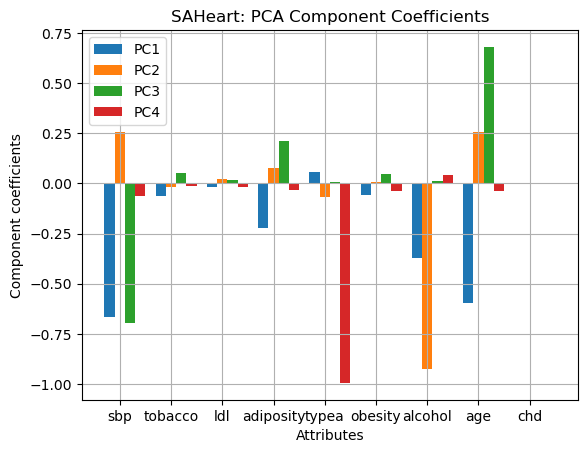

In [155]:
U,S,Vh = svd(Y,full_matrices=False)
V=Vh.T
N,M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2,3]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,M+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('SAHeart: PCA Component Coefficients')
plt.show()


In [156]:
# Inspecting the plot, we see that the 2nd principal component has large
# (in magnitude) coefficients for attributes A, E and H. We can confirm
# this by looking at it's numerical values directly, too:

pcs = [0,1,2,3]
for i in pcs:
    print('PC',i+1)
    print(V[:,i])

PC 1
[-0.66628532 -0.06176023 -0.01896256 -0.21994881  0.0592953  -0.05706144
 -0.37407841 -0.59733231  0.        ]
PC 2
[ 0.25737589 -0.01566814  0.02096561  0.07506976 -0.06926022  0.00878179
 -0.9252215   0.25793064  0.        ]
PC 3
[-0.6968211   0.05197388  0.01699036  0.21275377  0.00539098  0.04723429
  0.01281923  0.68100056  0.        ]
PC 4
[-0.06052706 -0.01360127 -0.01776619 -0.03413938 -0.99484802 -0.0384773
  0.04316134 -0.04005449  0.        ]


In [157]:
# How does this translate to the actual data and its projections?
# Looking at the data for water:

# Projection of water class onto the 2nd principal component.
all_absent_data = Y[y==0,:]


pcs = [0,1,2,3]

for i in pcs:
    print('Absent observation PC',i+1)
    print(all_absent_data[i,:])
    print(' ')
    print('Projection absent PC', i+1)
    print(all_absent_data[i,:]@V[:,i])
    print(' ')

Absent observation PC 1
[  9  -2   0   4   2   3 -10  21   0]
 
Projection absent PC 1
-15.608630782168596
 
Absent observation PC 2
[  7   1   0  -7   6  -4 -10  -3   0]
 
Projection absent PC 2
9.2882094009523
 
Absent observation PC 3
[-16  -2  -2 -13   6  -3 -12 -24   0]
 
Projection absent PC 3
-8.361791049445868
 
Absent observation PC 4
[ -2  -2  -2  -6  -3  -1 -12 -26   0]
 
Projection absent PC 4
3.935127429397465
 


In [158]:

pcs = [0,1,2,3]

# Projection and observation of present class
all_present_data = Y[y==1,:]

for i in pcs:
    print('Present observation PC',i+1)
    print(all_present_data[i,:])
    print(' ')
    print('Projection present PC', i+1)
    print(all_present_data[i,:]@V[:,i])
    print(' ')

Present observation PC 1
[-16  -2   0   8   0   4  -9   4   0]
 
Projection present PC 1
9.773625791695736
 
Present observation PC 2
[35  4  2 14 -1  6 11 16  0]
 
Projection present PC 2
4.109796270309094
 
Present observation PC 3
[-2  3  2 12  9  5  1  3  0]
 
Projection present PC 3
6.477100997671325
 
Present observation PC 4
[-20   1   0  -9   9  -1  -6  16   0]
 
Projection present PC 4
-8.310800340139371
 


Text(0.5, 1.0, 'SAHeart: attribute standard deviations')

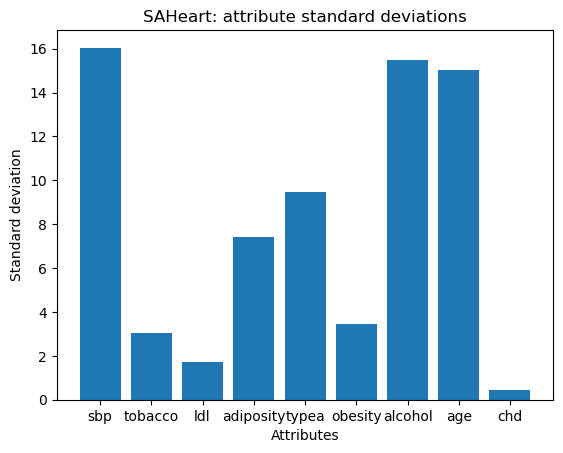

In [159]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X,0))
plt.xticks(r, attributeNames)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('SAHeart: attribute standard deviations')


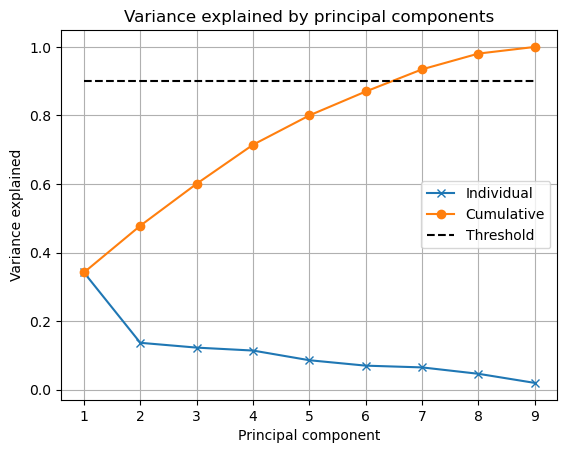

In [160]:
# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions 
# of Y2

U,S,Vh = svd(Y2,full_matrices=False)
V2=Vh.T
N,M = X.shape

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

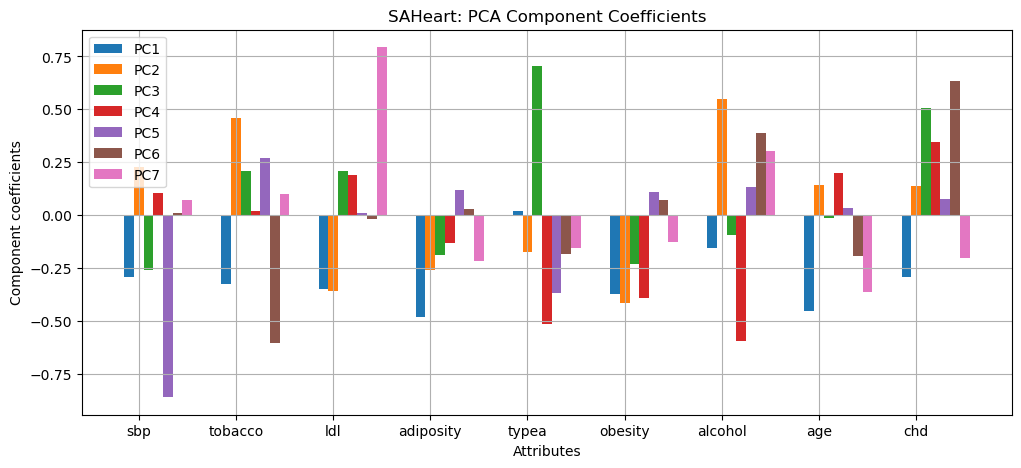

In [161]:
# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions 
# of Y2

U,S,Vh = svd(Y2,full_matrices=False)
V2=Vh.T
N,M = X.shape


# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2,3,4,5,6]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .1
r = np.arange(1,M+1)
plt.figure(figsize=(12,5))

for i in pcs:
    plt.subplot()
    plt.bar(r+i*bw, V2[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('SAHeart: PCA Component Coefficients')
plt.show()

In [162]:
pcs = [0,1,2,3,4,5,6]
for i in pcs:
    print('PC',i+1)
    print(V2[:,i])

PC 1
[-0.29147603 -0.3244286  -0.34858319 -0.48251014  0.01820435 -0.37275334
 -0.15605708 -0.45427169 -0.29234997]
PC 2
[ 0.22522555  0.45839658 -0.35923322 -0.26193648 -0.1735879  -0.41718626
  0.54637952  0.14154973  0.13690421]
PC 3
[-0.25866092  0.20689734  0.20837723 -0.19059019  0.70286134 -0.23012204
 -0.09653394 -0.0134871   0.50405497]
PC 4
[ 0.10541046  0.01767635  0.19118046 -0.13105276 -0.51429056 -0.39362551
 -0.59716088  0.19672211  0.34657592]
PC 5
[-0.86213101  0.2683608   0.00730341  0.11766906 -0.36702218  0.10965081
  0.1310969   0.03184371  0.07670892]
PC 6
[ 0.01155327 -0.605974   -0.0195162   0.02612522 -0.18627626  0.07071191
  0.38974036 -0.1948484   0.63406321]
PC 7
[ 0.07260808  0.09806597  0.79341829 -0.21807936 -0.15859576 -0.12998839
  0.30109093 -0.36580154 -0.20377397]


In [163]:
# Projection and observation of absent class
all_absent_data = Y2[y==0,:]

for i in pcs:
    print('Absent observation PC',i+1)
    print(all_absent_data[i,:])
    print(' ')
    print('Projection Absent PC', i+1)
    print(all_absent_data[i,:]@V2[:,i])
    print(' ')

Absent observation PC 1
[ 0.58182321 -0.80293182  0.05272972  0.58721621  0.26471946  0.9327906
 -0.65236339  1.45025351  1.53960072]
 
Projection Absent PC 1
-1.5607991036413162
 
Absent observation PC 2
[ 0.45717127  0.51210612 -0.52889505 -1.02698165  0.68687887 -1.3769766
 -0.65236339 -0.2110389  -0.64951905]
 
Projection Absent PC 2
0.7767044463814106
 
Absent observation PC 3
[-1.03865204 -0.80293182 -1.69214459 -1.83408057  0.68687887 -1.0882557
 -0.78169905 -1.60652453 -0.64951905]
 
Projection Absent PC 3
0.602434370540271
 
Absent observation PC 4
[-0.16608844 -0.80293182 -1.69214459 -0.89246516 -0.36851964 -0.5108139
 -0.78169905 -1.73942793 -0.64951905]
 
Projection Absent PC 4
0.05185874923437134
 
Absent observation PC 5
[ 0.20786739 -0.80293182 -0.52889505  0.58721621  0.15917961  0.9327906
 -0.71703122  1.11799503 -0.64951905]
 
Projection Absent PC 5
-0.39381446924859215
 
Absent observation PC 6
[ 0.64414919  2.15590354  0.63435449  0.45269972  0.68687887 -1.3769766
 

In [164]:
# Projection and observation of present class
all_present_data = Y2[y==1,:]

for i in pcs:
    print('Present observation PC',i+1)
    print(all_present_data[i,:])
    print(' ')
    print('Projection present PC', i+1)
    print(all_present_data[i,:]@V2[:,i])
    print(' ')

Present observation PC 1
[-1.03865204 -0.80293182 -0.52889505  1.12528216 -0.05190009  1.2215115
 -0.58769556  0.32057467 -0.64951905]
 
Projection present PC 1
-0.11565426311887911
 
Present observation PC 2
[ 2.20229847  1.49838457  1.21597926  1.93238108 -0.15743994  1.79895329
  0.77032888  1.11799503  1.53960072]
 
Projection present PC 2
0.30663971743498425
 
Present observation PC 3
[-0.16608844  1.16962509  1.21597926  1.66334811  1.00349842  1.5102324
  0.12365058  0.25412297 -0.64951905]
 
Projection present PC 3
0.23634276986522423
 
Present observation PC 4
[-1.28795592  0.51210612  0.05272972 -1.29601462  1.00349842 -0.5108139
 -0.39369207  1.11799503  1.53960072]
 
Projection present PC 4
0.7268153208379092
 
Present observation PC 5
[-1.28795592 -0.80293182 -0.52889505 -0.62343218 -0.36851964 -0.222093
 -0.65236339 -0.80910417 -0.64951905]
 
Projection present PC 5
0.7674805073688105
 
Present observation PC 6
[-0.16608844 -0.80293182  0.63435449  0.85624918  1.74227738 

In [165]:
#week 4

In [166]:
import pandas as pd

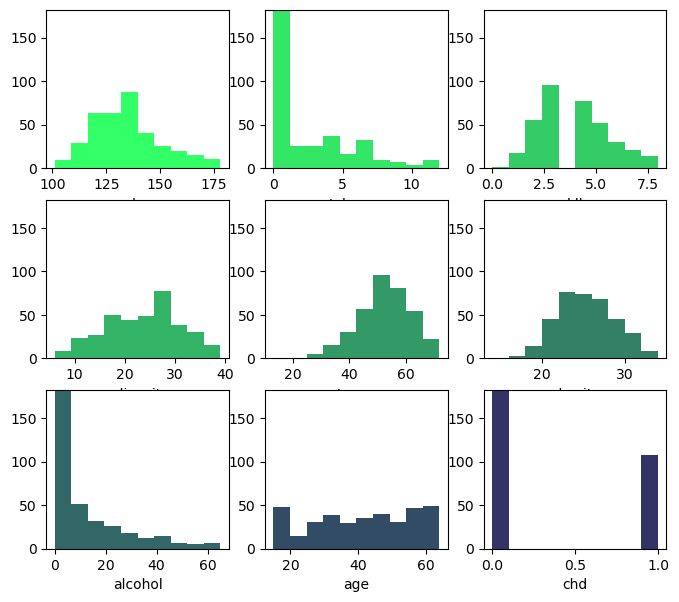

In [167]:

from matplotlib.pyplot import figure, subplot, hist, xlabel, ylim, show
import numpy as np


figure(figsize=(8,7))
u = int(np.floor(np.sqrt(M))); v = int(np.ceil(float(M)/u))
for i in range(M):
    subplot(u,v,i+1)
    hist(X[:,i], color=(0.2, 1-i*0.1, 0.4))
    xlabel(attributeNames[i])
    ylim(0,N/2)
    
show()


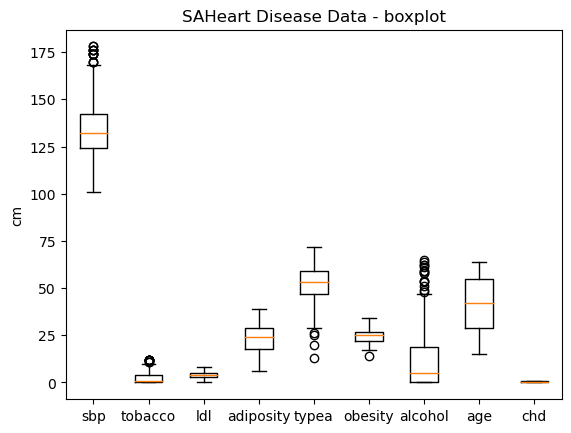

In [168]:

from matplotlib.pyplot import boxplot, xticks, ylabel, title, show

boxplot(X)
xticks(range(1,10),attributeNames)
ylabel('cm')
title('SAHeart Disease Data - boxplot')
show()



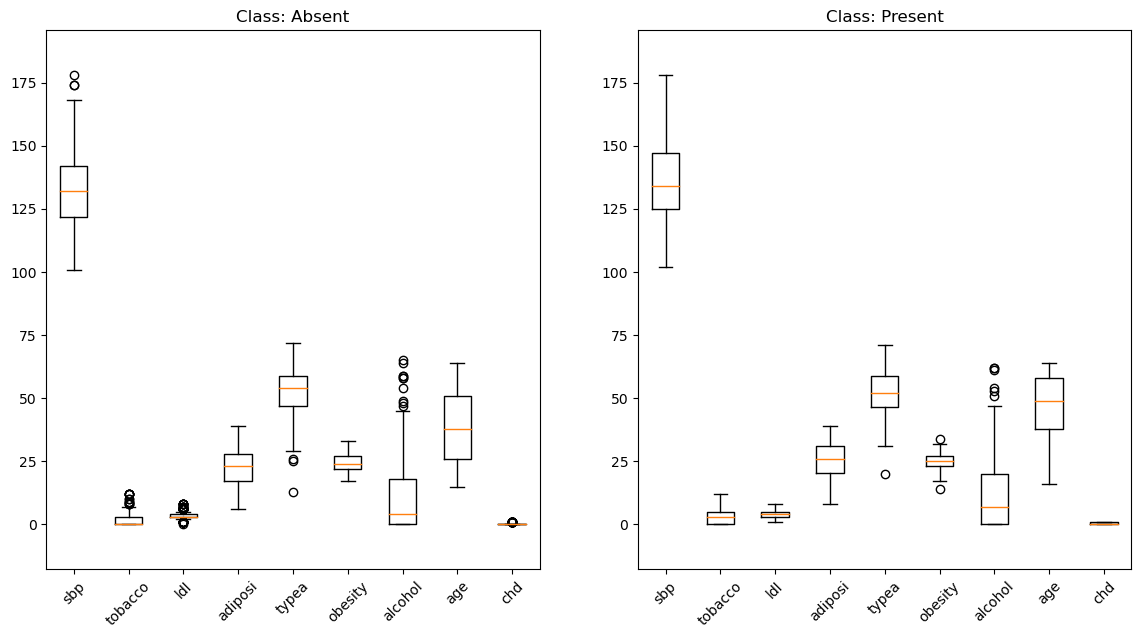

In [169]:

from matplotlib.pyplot import (figure, subplot, boxplot, title, xticks, ylim, 
                               show)


figure(figsize=(14,7))
for c in range(C):
    subplot(1,C,c+1)
    class_mask = (y==c) 
    
    boxplot(X[class_mask,:])
    #title('Class: {0}'.format(classNames[c]))
    title('Class: '+classNames[c])
    xticks(range(1,len(attributeNames)+1), [a[:7] for a in attributeNames], rotation=45)
    y_up = X.max()+(X.max()-X.min())*0.1; y_down = X.min()-(X.max()-X.min())*0.1
    ylim(y_down, y_up)

show()


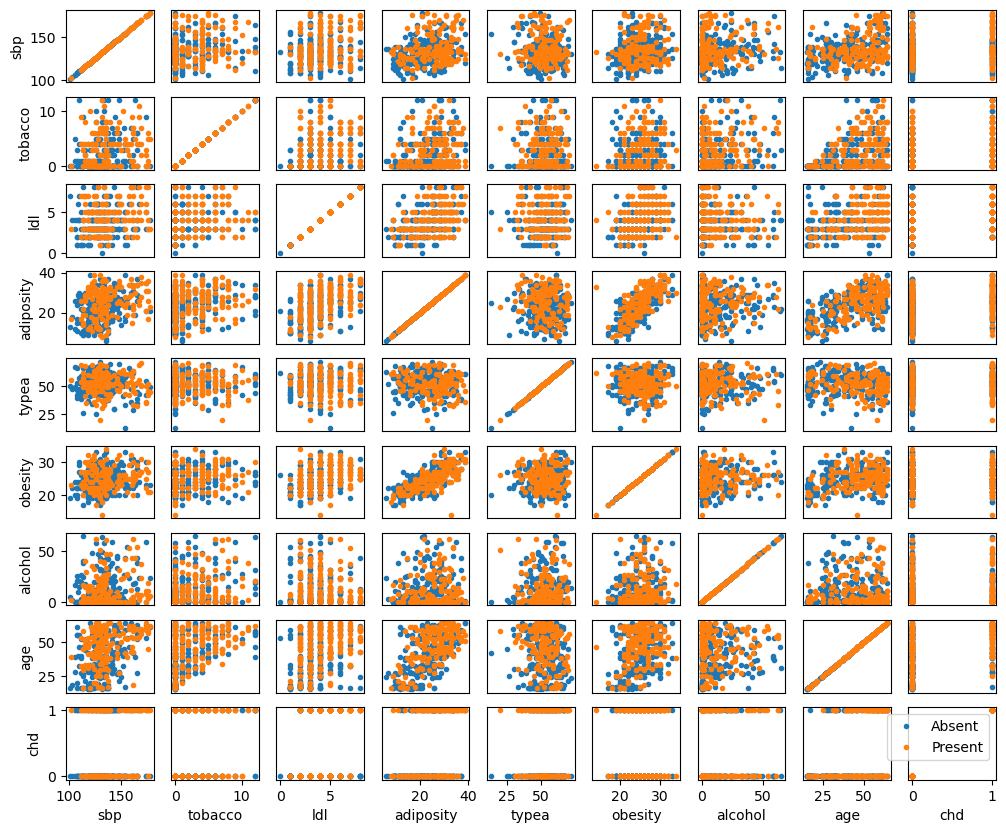

In [170]:


from matplotlib.pyplot import (figure, subplot, plot, xlabel, ylabel, 
                               xticks, yticks,legend,show)



figure(figsize=(12,10))
for m1 in range(M):
    for m2 in range(M):
        subplot(M, M, m1*M + m2 + 1)
        for c in range(C):
            class_mask = (y==c)
            plot(np.array(X[class_mask,m2]), np.array(X[class_mask,m1]), '.')
            if m1==M-1:
                xlabel(attributeNames[m2])
            else:
                xticks([])
            if m2==0:
                ylabel(attributeNames[m1])
            else:
                yticks([])
            #ylim(0,X.max()*1.1)
            #xlim(0,X.max()*1.1)
legend(classNames)

show()

